<a href="https://colab.research.google.com/github/susan-sajadi/stc510/blob/master/Module6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
from zipfile import ZipFile
from io import BytesIO
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as urllib

Prompt: Re: External Experiment

Dear Analyst,

Our R&D folks are curious about whether you can uncover the effect of "removing" a member of a covert network. The question is simple. What if we took out one member--say, gave him a free Netflix subscription or got him hooked on play a particularly addictive video game. What would the resulting effect on the network as a whole be? How would we choose the best person to target? What would be the effect of the intervention be?

Let us know what you find out.

Thanks,

Smith

Basics
Analyze a covert social network to determine who the weakest link is, and what happens to the network when you remove that link. Provide notes and a write-up, which should include at least some level of visualization.
Pass the Connected Data Basics quiz with a score of 85% or better.
This doesn't require the use of a specific network, but you can find a collection of covert social networks here (Links to an external site.). Pick one or more to work with.

Do what you need to do to import them and make sense of them. Some contain dynamic data over time--while you are welcome to take one of these on, it may be easier to just focus on the network during it's most connected period (usually at or near the end of the time series). How would you figure out the most effective node to remove. You can do this theoretically, or experimentally (remove the node and re-run the network metrics) or some combination of both.

Write up your observations, including any visualizations of the data. This may be part of your notebook or separate from it. Upload all to your repository and be ready to share the link/files. You'll enter these when you take the test.

The data I chose to use is baseball data on steroid use. I am planning to look at this network and see what the weakeast link would have been, and if there was an opportunity for intervention. 

In [56]:
url = 'http://www.casos.cs.cmu.edu/tools/datasets/external/baseball/baseball.zip'
with urllib.urlopen(url) as stream:
    with ZipFile(BytesIO(stream.read())) as archive:
        archive.printdir()
        file1 = archive.read('BASEBALL_1M.csv').decode()
        file2 = archive.read('BASEBALL_2M.csv').decode()

File Name                                             Modified             Size
BASEBALL_1M.csv                                2017-01-08 00:36:14        12359
BASEBALL_2M.csv                                2017-01-08 00:36:14         3011


Since these files were CSV, I knew I had to do some conversion. After looking into some different methods, the easiest way was to open this CSV in Gephi. Gephi is able to open CSV and then I could export it as GML to make it easier to do this analysis. 

In [ ]:
baseballstring = open('baseball.graphml', 'r').read()
print(baseballstring)
G = nx.parse_graphml(baseballstring)


In [111]:
print(nx.info(G))


Name: 
Type: DiGraph
Number of nodes: 78
Number of edges: 227
Average in degree:   2.9103
Average out degree:   2.9103


Based on the degree here, this is a pretty close network of players. 

In [ ]:
nx.betweenness_centrality(G)

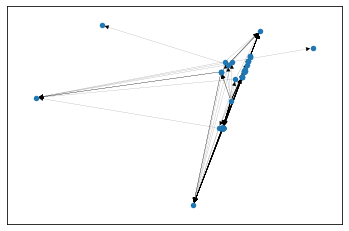

In [126]:
options = {
    'node_size' : 30,
    'linewidths' : 0,
    'width': 0.1,
    'with_labels': False
    # 'node_color' : 
}
nx.draw_networkx(G, **options)


The highest centrality is with Jose Canseco (I am not too familiar with baseball, but when I said his name my husband said that the name sounds right for possibly being the key link). Based on this data, removing this node (or having an intervention with this individual) may be the most helpful. I am going to go ahead and remove to see what happens. 
However, the numbers do seem to be low overall. Further, the average of degrees is low too--meaning this network is pretty conencted already. So it is difficult to say if it would make a difference. It appears it may not be the players themselves that are the connections between steroid use. The data has a second file I can look at as well. 

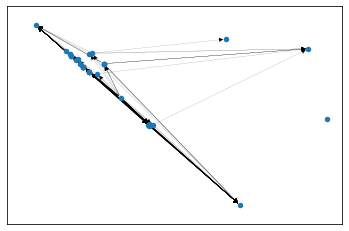

In [130]:
list(G.nodes)
#G.remove_node('Jose_Canseco')

options = {
    'node_size' : 30,
    'linewidths' : 0,
    'width': 0.1,
    'with_labels': False
    # 'node_color' : 
}
nx.draw_networkx(G, **options)


In [ ]:
nx.betweenness_centrality(G)

In [ ]:
nx.betweenness_centrality_source(G)

So if it is not the players, what might it be? Luckily, we seem to have some additional data on certain facilites they go to. Maybe there is a link there. This is the second file in the original data set. 
So now I will read and parse the second file to look at the same characteristics. 

In [157]:
baseballstring2 = open('baseball2.graphml', 'r').read()
print(baseballstring2)
G2 = nx.parse_graphml(baseballstring2)


<?xml version="1.0" encoding="UTF-8"?><graphml xmlns="http://graphml.graphdrawing.org/xmlns">
<key attr.name="label" attr.type="string" for="node" id="label"/>
<key attr.name="Edge Label" attr.type="string" for="edge" id="edgelabel"/>
<key attr.name="weight" attr.type="double" for="edge" id="weight"/>
<key attr.name="r" attr.type="int" for="node" id="r"/>
<key attr.name="g" attr.type="int" for="node" id="g"/>
<key attr.name="b" attr.type="int" for="node" id="b"/>
<key attr.name="x" attr.type="float" for="node" id="x"/>
<key attr.name="y" attr.type="float" for="node" id="y"/>
<key attr.name="size" attr.type="float" for="node" id="size"/>
<graph edgedefault="undirected">
<node id="﻿&quot;&quot;">
<data key="label">﻿""</data>
<data key="size">10.0</data>
<data key="r">0</data>
<data key="g">0</data>
<data key="b">0</data>
<data key="x">-311.47284</data>
<data key="y">217.011</data>
</node>
<node id="BALCO">
<data key="label">BALCO</data>
<data key="size">10.0</data>
<data key="r">0</data>

In [145]:
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 87
Number of edges: 156
Average degree:   3.5862


In [160]:
nx.betweenness_centrality(G2)

{'0': 0.34965800273597814,
 '1': 0.34965800273597814,
 'Adam_Platt': 3.799969600243198e-06,
 'Adam_Riggs': 3.799969600243198e-06,
 'American_Pharmaceutical_Group': 0.0,
 'Andy_Pettittle': 3.799969600243198e-06,
 'Applied_Pharmacy_Services': 0.0,
 'Arizona_AntiAging_Clinic': 0.0,
 'Armando_Rios': 3.799969600243198e-06,
 'BALCO': 0.0,
 'Barry_Bonds': 3.799969600243198e-06,
 'Bart_Miadich': 3.799969600243198e-06,
 'Benito_Santiago': 3.799969600243198e-06,
 'Bobby_Estalella': 3.799969600243198e-06,
 'Brendan_Donnelly': 3.799969600243198e-06,
 'BrianMcNamee': 0.0,
 'Brian_Roberts': 3.799969600243198e-06,
 'Chad_Allen': 3.799969600243198e-06,
 'Chris_Donnels': 3.799969600243198e-06,
 'Chuck_Knoblauch': 3.799969600243198e-06,
 'Cody_McKay': 3.799969600243198e-06,
 'Daren_Holmes': 3.799969600243198e-06,
 'David_Bell': 3.799969600243198e-06,
 'David_Justice': 3.799969600243198e-06,
 'David_Segul': 3.799969600243198e-06,
 'Denny_Neagle': 3.799969600243198e-06,
 'Eric_Gagne': 3.799969600243198e-0

In [158]:
nx.degree_centrality(G2)

{'0': 0.8372093023255813,
 '1': 0.8372093023255813,
 'Adam_Platt': 0.023255813953488372,
 'Adam_Riggs': 0.023255813953488372,
 'American_Pharmaceutical_Group': 0.011627906976744186,
 'Andy_Pettittle': 0.023255813953488372,
 'Applied_Pharmacy_Services': 0.011627906976744186,
 'Arizona_AntiAging_Clinic': 0.011627906976744186,
 'Armando_Rios': 0.023255813953488372,
 'BALCO': 0.011627906976744186,
 'Barry_Bonds': 0.023255813953488372,
 'Bart_Miadich': 0.023255813953488372,
 'Benito_Santiago': 0.023255813953488372,
 'Bobby_Estalella': 0.023255813953488372,
 'Brendan_Donnelly': 0.023255813953488372,
 'BrianMcNamee': 0.011627906976744186,
 'Brian_Roberts': 0.023255813953488372,
 'Chad_Allen': 0.023255813953488372,
 'Chris_Donnels': 0.023255813953488372,
 'Chuck_Knoblauch': 0.023255813953488372,
 'Cody_McKay': 0.023255813953488372,
 'Daren_Holmes': 0.023255813953488372,
 'David_Bell': 0.023255813953488372,
 'David_Justice': 0.023255813953488372,
 'David_Segul': 0.023255813953488372,
 'Denny_Ne

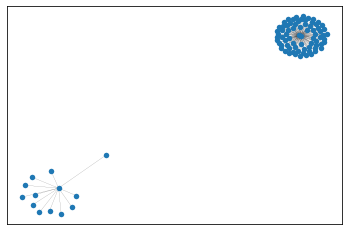

In [167]:
options = {
    'node_size' : 30,
    'linewidths' : 0,
    'width': 0.1,
    'with_labels': False
    # 'node_color' : 
}
nx.draw_networkx(G2, **options)


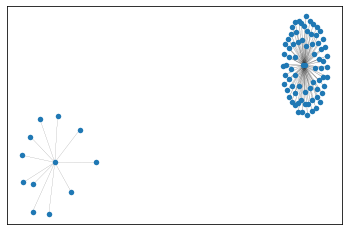

In [171]:
#G2.remove_node('Kirk_Radomski')
options = {
    'node_size' : 30,
    'linewidths' : 0,
    'width': 0.1,
    'with_labels': False
    # 'node_color' : 
}
nx.draw_networkx(G2, **options)

So this graphic looks very different, and it appears that there are individuals that connect a lot of nodes (and by indivuiduals these are clinics and distributors I believe). So to me, it appears this problem is actually more systemic. 

My overall recommendation is that it may be best to re-evaluate the system and get at why this is occuring, rather than try to pinpoint an individual in this case. 